In [10]:
import os
import re
import pandas as pd

BASE_DIR = "/srv/rl2-lab/flash8/rbansal66/vvla/openpi/examples/libero/data/moving_bowl"

# Accept both `replan_na` and `replan1` / `replan5` style names
pattern = re.compile(
    r"rtc(?P<rtc>True|False)_lat(?P<lat>[-0-9.]+)_hrzn(?P<hrzn>\d+)_nobj(?P<nobj>\d+)_replan_?(?P<replan>\w+)"
)

rows = []

for run_name in sorted(os.listdir(BASE_DIR)):
    run_path = os.path.join(BASE_DIR, run_name)
    if not os.path.isdir(run_path):
        continue

    m = pattern.search(run_name)
    if not m:
        continue

    rtc_flag = m.group("rtc") == "True"
    latency_ms = float(m.group("lat"))
    action_horizon = int(m.group("hrzn"))
    n_obj_steps = int(m.group("nobj"))
    replan_raw = m.group("replan")

    if replan_raw.lower() == "na":
        replan_steps = None
    else:
        try:
            replan_steps = int(replan_raw)
        except ValueError:
            replan_steps = None

    summary_csv = os.path.join(run_path, "results_summary.csv")
    if not os.path.exists(summary_csv):
        continue

    df = pd.read_csv(summary_csv)
    if df.empty:
        continue

    row = df.iloc[0]
    success_rate = float(row["success_rate"])

    rows.append(
        {
            "RTC": "on" if rtc_flag else "off",
            "Action Horizon": action_horizon,
            "Replan After _ Steps": "n/a" if replan_steps is None else replan_steps,
            "Obj. Step Speed (lower = faster)": n_obj_steps,
            "Artificial Latency (ms)": latency_ms,
            "Success Rate": success_rate,
        }
    )

summary_df = pd.DataFrame(rows)
if not summary_df.empty:
    summary_df = summary_df.sort_values(
        by=["RTC", "Artificial Latency (ms)", "Replan After _ Steps", "Obj. Step Speed (lower = faster)"]
    ).reset_index(drop=True)

summary_df


,RTC,Action Horizon,Replan After _ Steps,Obj. Step Speed (lower = faster),Artificial Latency (ms),Success Rate
0,off,10,1,1,0.0,0.10
1,off,10,1,5,0.0,0.80
2,off,10,5,1,0.0,0.25
3,off,10,5,5,0.0,0.65
4,off,10,1,1,10.0,0.10
5,off,10,1,5,10.0,0.75
6,off,10,5,1,10.0,0.30
7,off,10,5,5,10.0,0.65
8,off,10,1,1,50.0,0.15
9,off,10,1,5,50.0,0.55


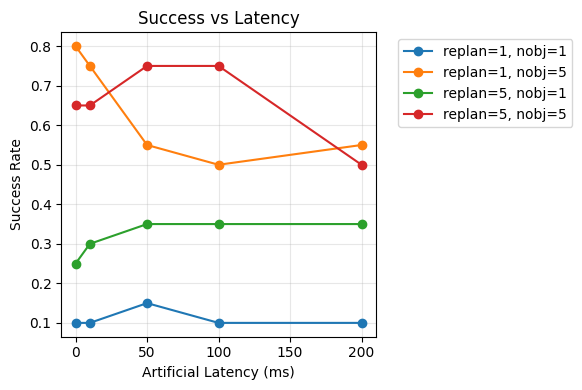

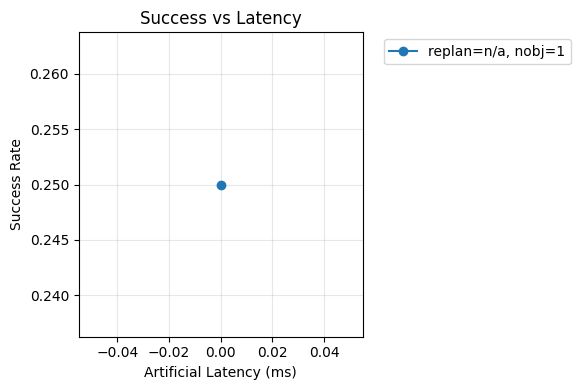

In [11]:
import matplotlib.pyplot as plt

# Expect `summary_df` to be defined from the previous cell

def plot_success_vs_latency(df, title):
    if df.empty:
        print(f"No data for: {title}")
        return

    fig, ax = plt.subplots(figsize=(6, 4))

    for (replan, nobj), grp in df.groupby(["Replan After _ Steps", "Obj. Step Speed (lower = faster)"]):
        grp_sorted = grp.sort_values("Artificial Latency (ms)")
        label = f"replan={replan}, nobj={nobj}"
        ax.plot(
            grp_sorted["Artificial Latency (ms)"],
            grp_sorted["Success Rate"],
            marker="o",
            label=label,
        )

    ax.set_xlabel("Artificial Latency (ms)")
    ax.set_ylabel("Success Rate")
    ax.set_title(title)
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot separately for RTC off / on
for rtc_value in ["off", "on"]:
    subset = summary_df[summary_df["RTC"] == rtc_value]
    plot_success_vs_latency(subset, title=f"Success vs Latency")


In [37]:
import json
import os

import matplotlib.pyplot as plt
import pandas as pd

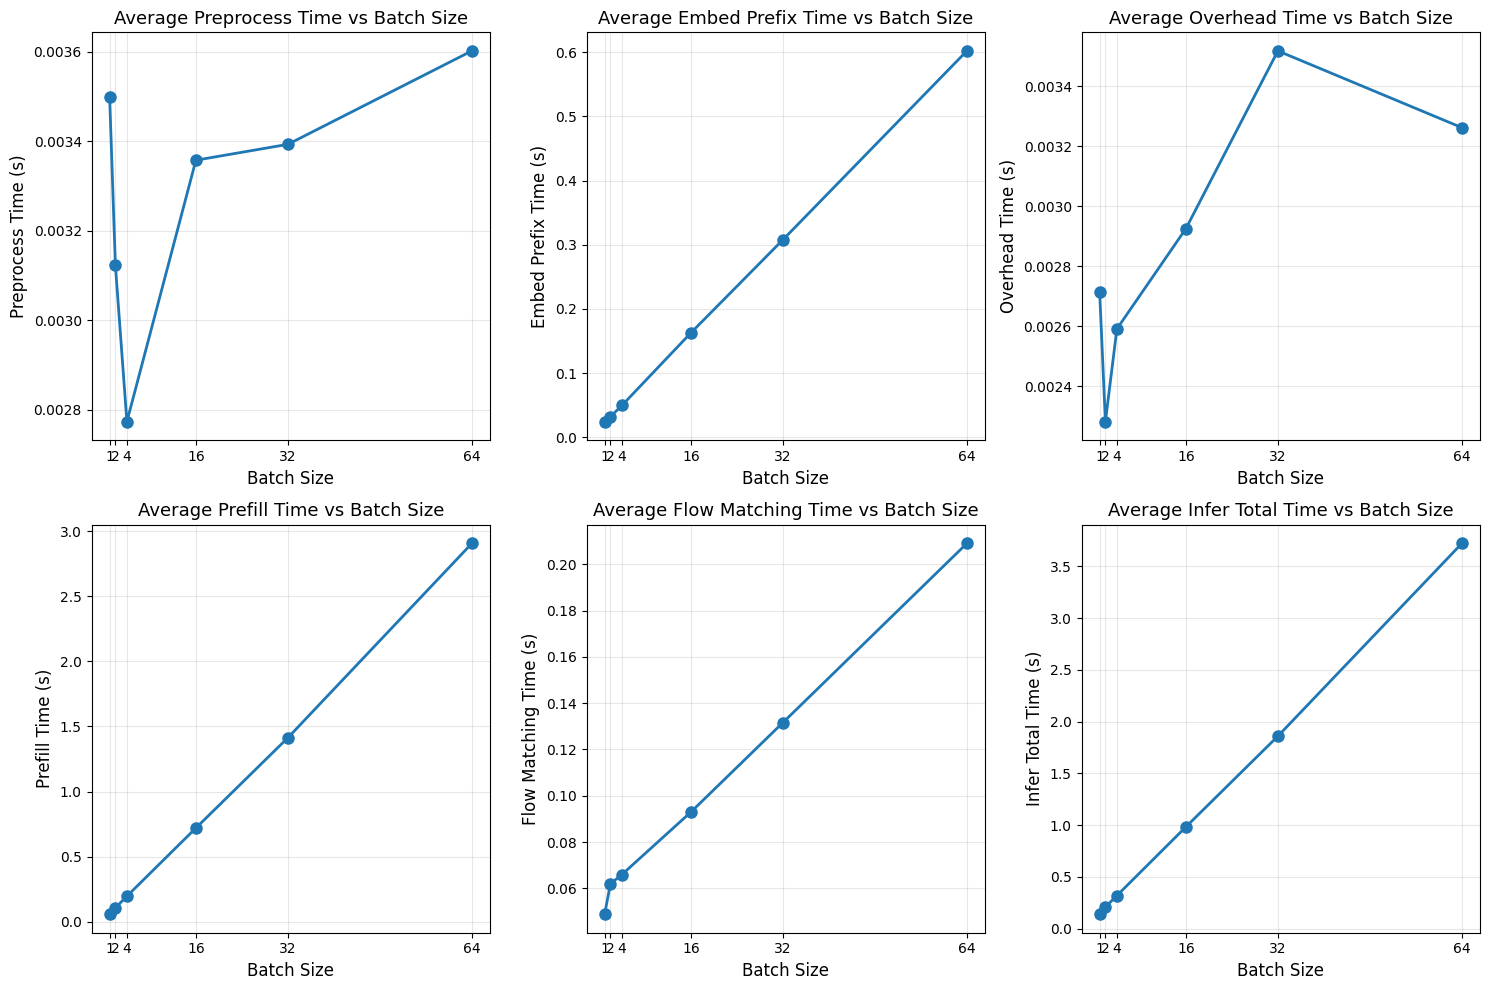

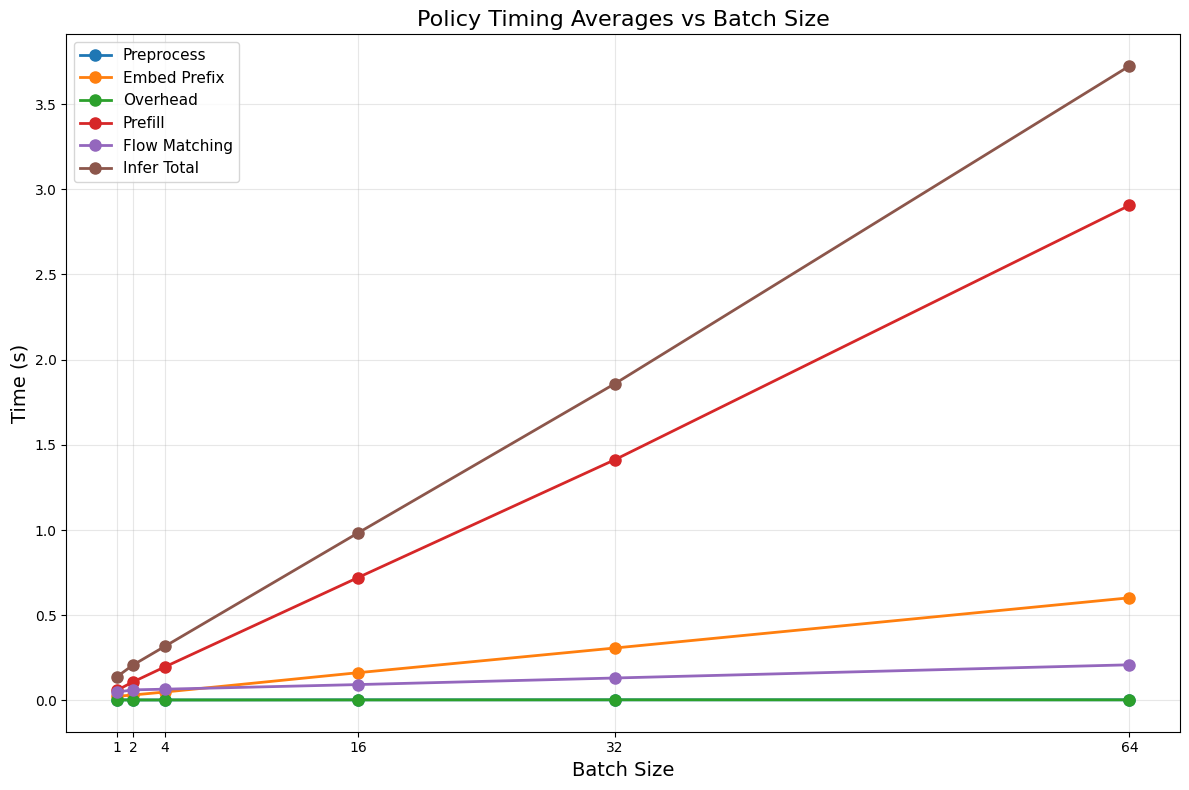


Summary Statistics:

Batch Size: 1
----------------------------------------
  Preprocess          : 0.003498 ± 0.000430 s
  Embed Prefix        : 0.024159 ± 0.000153 s
  Overhead            : 0.002715 ± 0.000837 s
  Prefill             : 0.059546 ± 0.000589 s
  Flow Matching       : 0.048823 ± 0.000664 s
  Infer Total         : 0.138771 ± 0.001467 s

Batch Size: 2
----------------------------------------
  Preprocess          : 0.003122 ± 0.000570 s
  Embed Prefix        : 0.031893 ± 0.000187 s
  Overhead            : 0.002282 ± 0.000522 s
  Prefill             : 0.108463 ± 0.000293 s
  Flow Matching       : 0.061899 ± 0.000618 s
  Infer Total         : 0.207686 ± 0.001072 s

Batch Size: 4
----------------------------------------
  Preprocess          : 0.002773 ± 0.000528 s
  Embed Prefix        : 0.049402 ± 0.000189 s
  Overhead            : 0.002592 ± 0.000789 s
  Prefill             : 0.197551 ± 0.000435 s
  Flow Matching       : 0.065935 ± 0.001041 s
  Infer Total         : 0.318

In [38]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

benchmark_results_dir = "/srv/rl2-lab/flash8/rbansal66/vvla/openpi/benchmarks/latency_batching_300"

# Dictionary to store timing data by batch size
timing_by_batch = defaultdict(lambda: {
    'preprocess': [],
    'embed_prefix': [],
    'overhead': [],
    'prefill': [],
    'flow_matching': [],
    'infer_total': []
})

# Load all benchmark files
for filename in os.listdir(benchmark_results_dir):
    if not filename.endswith('.json'):
        continue
    
    filepath = os.path.join(benchmark_results_dir, filename)
    with open(filepath, 'r') as f:
        data = json.load(f)
    
    batch_size = data.get('batch_size')
    if batch_size is None:
        continue
    
    # Extract policy_timing data
    policy_timing = data.get('policy_timing', [])
    if not policy_timing:
        continue
    
    # Collect all timing values for this batch size
    for timing_entry in policy_timing:
        for key in ['preprocess', 'embed_prefix', 'overhead', 'prefill', 'flow_matching', 'infer_total']:
            if key in timing_entry:
                timing_by_batch[batch_size][key].append(timing_entry[key])

# Calculate averages for each batch size
batch_sizes = sorted(timing_by_batch.keys())
averages = {
    'preprocess': [],
    'embed_prefix': [],
    'overhead': [],
    'prefill': [],
    'flow_matching': [],
    'infer_total': []
}

for batch_size in batch_sizes:
    for key in averages.keys():
        values = timing_by_batch[batch_size][key]
        if values:
            averages[key].append(np.mean(values))
        else:
            averages[key].append(0)

# Create the plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

metrics = ['preprocess', 'embed_prefix', 'overhead', 'prefill', 'flow_matching', 'infer_total']
metric_labels = ['Preprocess', 'Embed Prefix', 'Overhead', 'Prefill', 'Flow Matching', 'Infer Total']

for idx, (metric, label) in enumerate(zip(metrics, metric_labels)):
    ax = axes[idx]
    ax.plot(batch_sizes, averages[metric], marker='o', linewidth=2, markersize=8)
    ax.set_xlabel('Batch Size', fontsize=12)
    ax.set_ylabel(f'{label} Time (s)', fontsize=12)
    ax.set_title(f'Average {label} Time vs Batch Size', fontsize=13)
    ax.grid(True, alpha=0.3)
    ax.set_xticks(batch_sizes)

plt.tight_layout()
plt.show()

# Also create a single plot with all metrics
plt.figure(figsize=(12, 8))
for metric, label in zip(metrics, metric_labels):
    plt.plot(batch_sizes, averages[metric], marker='o', linewidth=2, markersize=8, label=label)

plt.xlabel('Batch Size', fontsize=14)
plt.ylabel('Time (s)', fontsize=14)
plt.title('Policy Timing Averages vs Batch Size', fontsize=16)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(batch_sizes)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("=" * 60)
for batch_size in batch_sizes:
    print(f"\nBatch Size: {batch_size}")
    print("-" * 40)
    for metric, label in zip(metrics, metric_labels):
        values = timing_by_batch[batch_size][metric]
        if values:
            mean_val = np.mean(values)
            std_val = np.std(values)
            print(f"  {label:20s}: {mean_val:.6f} ± {std_val:.6f} s")

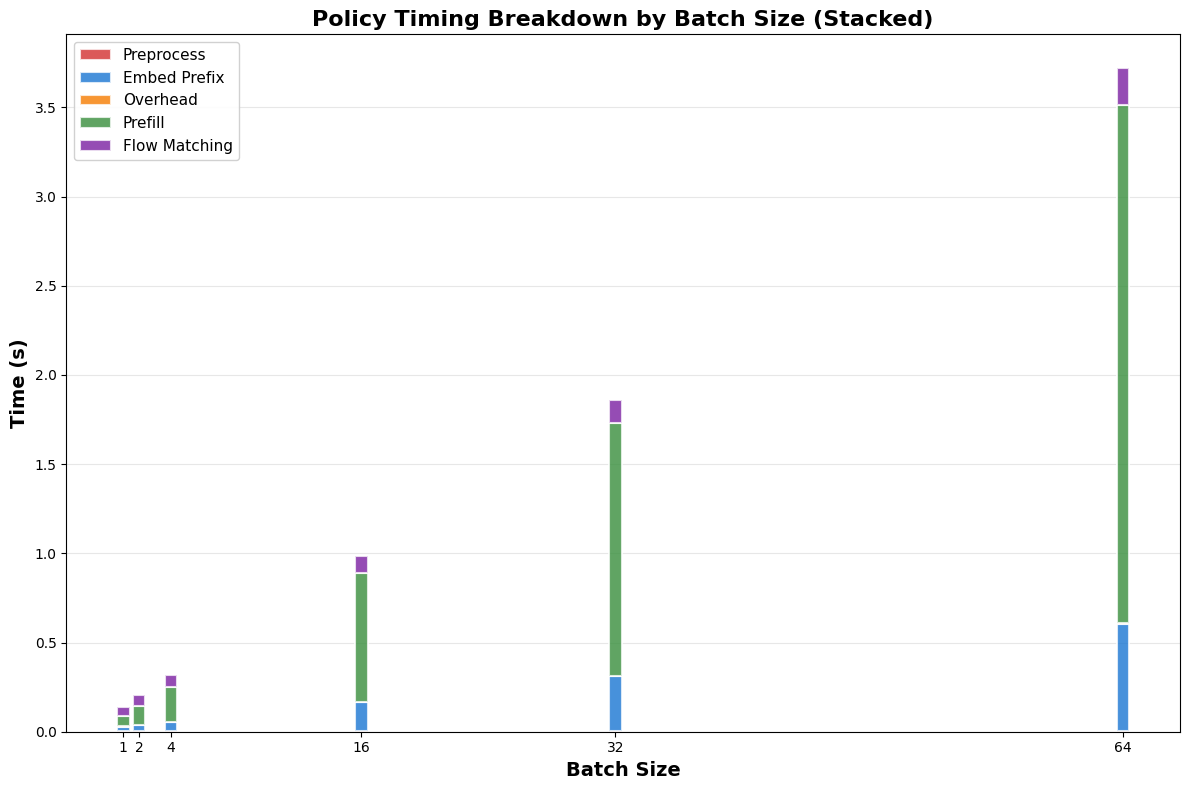

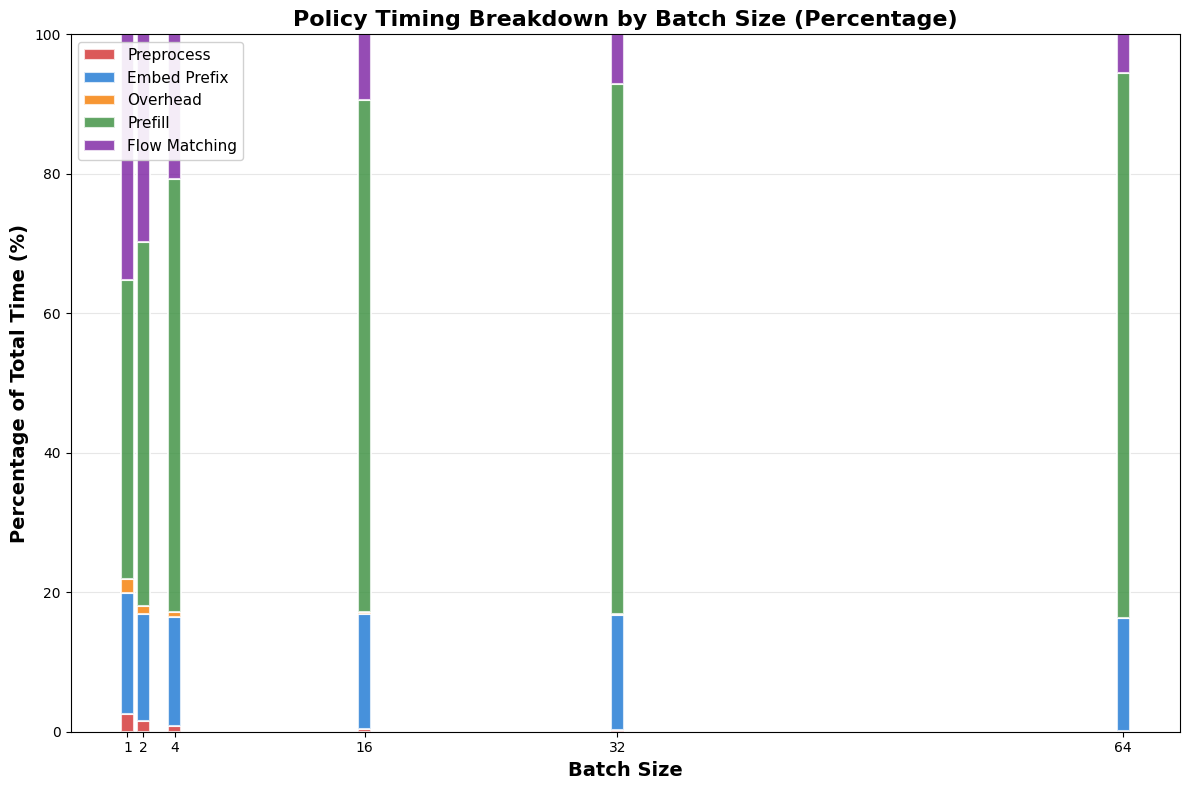

In [39]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

benchmark_results_dir = "/srv/rl2-lab/flash8/rbansal66/vvla/openpi/benchmarks/latency_batching_300"

# Dictionary to store timing data by batch size
timing_by_batch = defaultdict(lambda: {
    'preprocess': [],
    'embed_prefix': [],
    'overhead': [],
    'prefill': [],
    'flow_matching': [],
    'infer_total': []
})

# Load all benchmark files
for filename in os.listdir(benchmark_results_dir):
    if not filename.endswith('.json'):
        continue
    
    filepath = os.path.join(benchmark_results_dir, filename)
    with open(filepath, 'r') as f:
        data = json.load(f)
    
    batch_size = data.get('batch_size')
    if batch_size is None:
        continue
    
    # Extract policy_timing data
    policy_timing = data.get('policy_timing', [])
    if not policy_timing:
        continue
    
    # Collect all timing values for this batch size
    for timing_entry in policy_timing:
        for key in ['preprocess', 'embed_prefix', 'overhead', 'prefill', 'flow_matching', 'infer_total']:
            if key in timing_entry:
                timing_by_batch[batch_size][key].append(timing_entry[key])

# Calculate averages for each batch size
batch_sizes = sorted(timing_by_batch.keys())
averages = {
    'preprocess': [],
    'embed_prefix': [],
    'overhead': [],
    'prefill': [],
    'flow_matching': []
}

for batch_size in batch_sizes:
    for key in averages.keys():
        values = timing_by_batch[batch_size][key]
        if values:
            averages[key].append(np.mean(values))
        else:
            averages[key].append(0)

# Create stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each component
# Alternative: Even more contrasting colors
colors = {
    'preprocess': '#D32F2F',       # Deep red
    'embed_prefix': '#1976D2',     # Deep blue
    'overhead': '#F57C00',         # Deep orange
    'prefill': '#388E3C',          # Deep green
    'flow_matching': '#7B1FA2'     # Deep purple
}

# Order of stacking (bottom to top)
stack_order = ['preprocess', 'embed_prefix', 'overhead', 'prefill', 'flow_matching']
labels = ['Preprocess', 'Embed Prefix', 'Overhead', 'Prefill', 'Flow Matching']

# Create the stacked bars
bottom = np.zeros(len(batch_sizes))
bars = []

for metric, label in zip(stack_order, labels):
    values = averages[metric]
    bars.append(ax.bar(batch_sizes, values, bottom=bottom, label=label, 
                       color=colors[metric], alpha=0.8, edgecolor='white', linewidth=1.5))
    bottom += values

# Customize the plot
ax.set_xlabel('Batch Size', fontsize=14, fontweight='bold')
ax.set_ylabel('Time (s)', fontsize=14, fontweight='bold')
ax.set_title('Policy Timing Breakdown by Batch Size (Stacked)', fontsize=16, fontweight='bold')
ax.set_xticks(batch_sizes)
ax.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3, axis='y')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# Alternative: Stacked bar plot showing percentage contribution
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate percentages
percentages = {}
for metric in stack_order:
    percentages[metric] = []
    for i, batch_size in enumerate(batch_sizes):
        total = sum(averages[m][i] for m in stack_order)
        if total > 0:
            percentages[metric].append(100 * averages[metric][i] / total)
        else:
            percentages[metric].append(0)

# Create percentage stacked bars
bottom = np.zeros(len(batch_sizes))
for metric, label in zip(stack_order, labels):
    values = percentages[metric]
    ax.bar(batch_sizes, values, bottom=bottom, label=label, 
           color=colors[metric], alpha=0.8, edgecolor='white', linewidth=1.5)
    bottom += values

ax.set_xlabel('Batch Size', fontsize=14, fontweight='bold')
ax.set_ylabel('Percentage of Total Time (%)', fontsize=14, fontweight='bold')
ax.set_title('Policy Timing Breakdown by Batch Size (Percentage)', fontsize=16, fontweight='bold')
ax.set_xticks(batch_sizes)
ax.set_ylim(0, 100)
ax.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3, axis='y')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

In [40]:
import json
import os
import pandas as pd

# benchmark_results_dir = "../benchmarks/latency"
# benchmark_results_dir = "../benchmarks/latency_batching"
benchmark_results_dir = "/srv/rl2-lab/flash8/rbansal66/vvla/openpi/benchmarks/latency_batching_timeout_4"

rows = []
for filename in os.listdir(benchmark_results_dir):
    if not filename.endswith(".json"):
        continue

    with open(os.path.join(benchmark_results_dir, filename), "r") as f:
        record = json.load(f)

    # Select specific keys from data, including timeout if present
    row = {
        "num_steps": record.get("num_steps"),
        "action_horizon": record.get("action_horizon"),
        "batch_size": record.get("batch_size"),
        "batch_timeout_ms": record.get("batch_timeout_ms", 0),
        "request_rate": record.get("request_rate"),
        "request_throughput": record.get("request_throughput"),
        "mean_latency_ms": record.get("mean_latency_ms"),
        "median_latency_ms": record.get("median_latency_ms"),
        "std_latency_ms": record.get("std_latency_ms"),
        "p95_latency_ms": record.get("p95_latency_ms"),
        "p99_latency_ms": record.get("p99_latency_ms"),
    }
    rows.append(row)

df_raw = pd.DataFrame(rows)

# Aggregate in case we have multiple JSONs for the same
# (batch_size, batch_timeout_ms, request_rate) combo.
# This avoids plotting duplicate points on the same x value.
group_cols = ["batch_size", "batch_timeout_ms", "request_rate"]
agg = {
    "num_steps": "first",
    "action_horizon": "first",
    "request_throughput": "mean",
    "mean_latency_ms": "mean",
    "median_latency_ms": "mean",
    "std_latency_ms": "mean",
    "p95_latency_ms": "mean",
    "p99_latency_ms": "mean",
}

df = df_raw.groupby(group_cols, as_index=False).agg(agg)

df.head()

,batch_size,batch_timeout_ms,request_rate,num_steps,action_horizon,request_throughput,mean_latency_ms,median_latency_ms,std_latency_ms,p95_latency_ms,p99_latency_ms
0,1,0,5.0,10,10,4.959356,293.483320,243.232753,171.750709,693.291532,842.902894
1,1,0,10.0,10,10,6.792292,7845.066666,8209.409894,3972.713763,13004.561742,13825.938706
2,1,0,20.0,10,10,6.943876,14510.695779,14686.856674,8056.844812,26543.372050,27747.911239
3,1,0,50.0,10,10,6.775530,19320.101519,19407.903258,10975.526947,36183.562944,37757.673262
4,1,0,100.0,10,10,6.748360,20825.982131,20858.670423,11926.718936,39261.563047,40935.228557


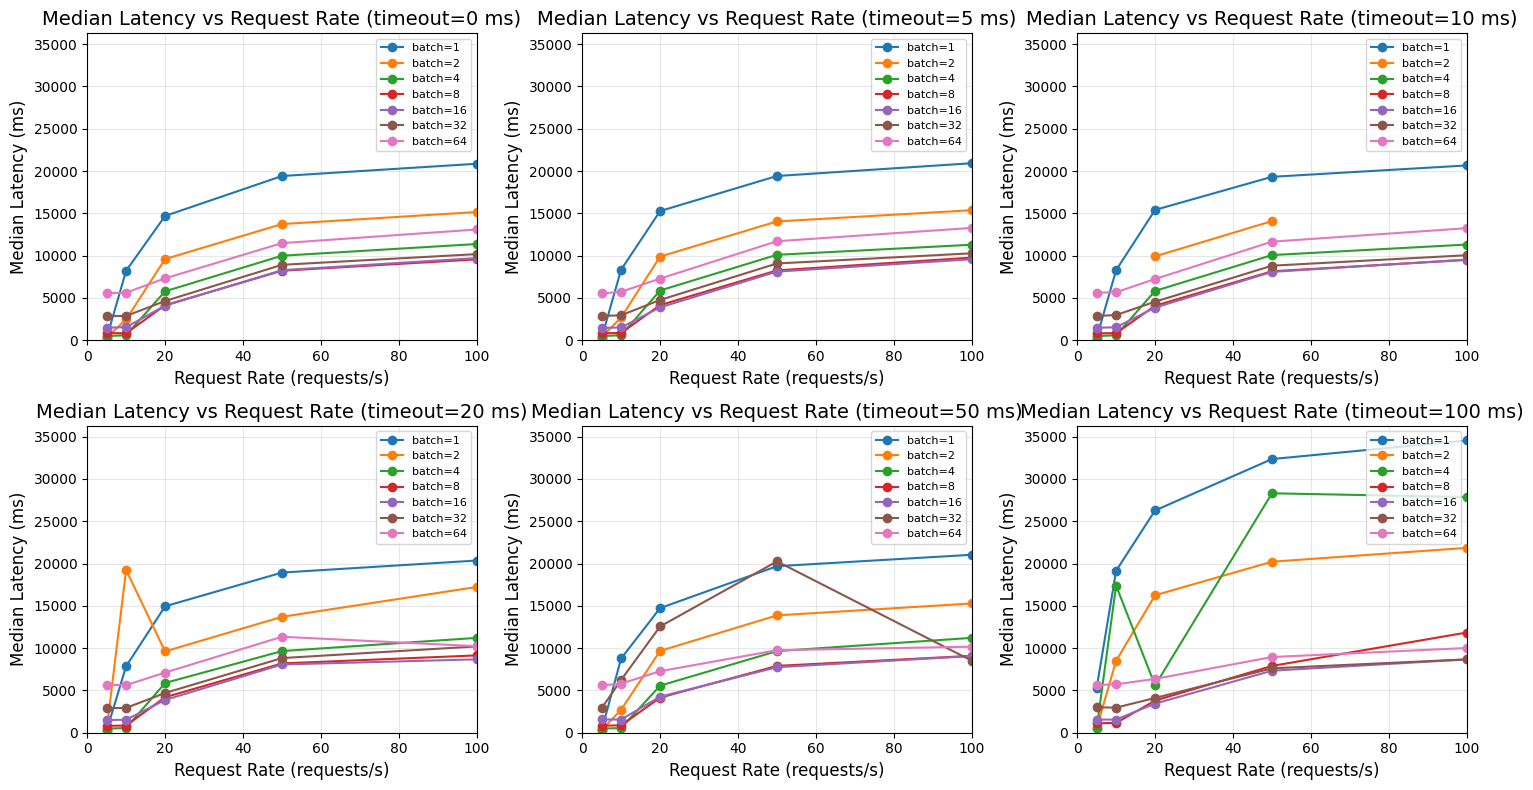

In [41]:
# Visualize median latency vs request rate for each (batch_size, batch_timeout_ms)

timeouts = sorted(df["batch_timeout_ms"].unique())
batch_sizes = sorted(df["batch_size"].unique())

n_timeouts = len(timeouts)
# Arrange timeouts in a grid, e.g., 2 rows x 3 columns for up to 6 timeouts
n_cols = 3
n_rows = (n_timeouts + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

for idx, t in enumerate(timeouts):
    r = idx // n_cols
    c = idx % n_cols
    ax = axes[r][c]

    subset_t = df[df["batch_timeout_ms"] == t]

    for bs in batch_sizes:
        subset = subset_t[subset_t["batch_size"] == bs].sort_values("request_rate")
        if subset.empty:
            continue
        ax.plot(
            subset["request_rate"],
            subset["median_latency_ms"],
            marker="o",
            label=f"batch={bs}",
        )

    ax.set_xlim(0, 100)
    ax.set_ylim(0, df["median_latency_ms"].max() * 1.05)
    ax.set_xlabel("Request Rate (requests/s)", fontsize=12)
    ax.set_ylabel("Median Latency (ms)", fontsize=12)
    ax.set_title(f"Median Latency vs Request Rate (timeout={t} ms)", fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)

# Hide any unused subplots
for idx in range(n_timeouts, n_rows * n_cols):
    r = idx // n_cols
    c = idx % n_cols
    axes[r][c].axis("off")

plt.tight_layout()
plt.show()

In [42]:
df.pivot_table(
    index="batch_size",
    columns="batch_timeout_ms",
    values="request_rate",
    aggfunc="nunique",
    fill_value=0,
)

batch_timeout_ms,0,5,10,20,50,100
batch_size,,,,,,
1,5,5,5,5,5,5
2,5,5,2,5,5,5
4,5,5,5,5,5,5
8,5,5,5,5,5,5
16,5,5,5,5,5,5
32,5,5,5,5,5,5
64,5,5,5,5,5,5
